In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
from .processing import *
from .utils import *
from .plasticity import plasticity_cv_fig

In [3]:
parameters = set_parameters()
f_keys = get_individuals_keys(parameters)
days = get_days(parameters)

Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/Projections
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/TSNE_Projections
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/TSNE
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/UMAP


In [9]:
files_kmeans = glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/cluster_entropy_kmeans/cluster_entropy_kmeans_hourly_*.csv"
)
files_wshed = glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/cluster_entropy_wshed/cluster_entropy_wshed_hourly_*.csv"
)
files_cv = glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/cv/cv_*_hourly.csv"
)
files_all_cv = glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/cv/cv_*_hourly_ndf_*.csv"
)

In [108]:
files_daily = sorted(glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/*/*daily*.csv"
))
files_hourly = sorted(glob.glob(
    "/Volumes/Extreme_SSD/content/Fish_moves_final/plasticity/*/*hourly*.csv"
))
len(files)

13

In [136]:
ff_mod = glob.glob("/Volumes/Extreme_SSD/content/Fish_moves_final/Projections/*pcaModes.mat")

In [214]:
n_total_days, _, df_per_day = len(ff_mod), 45*28, 143667
n_total_days, _, df_per_day

(1250, 1260, 143667)

In [205]:
data = np.empty((len(days), len(f_keys)))
data.fill(np.nan)
for i,fk in enumerate(f_keys):
    for j,d in enumerate(days):
        tra = load_trajectory_data(parameters,fk=fk,day=d)
        if len(tra)==1 and "positions" in tra[0]:
            data[j,i]=len(tra[0]["positions"])
df_num_dp = pd.DataFrame(data, index=days, columns=f_keys)

In [212]:
total_df = df_num_dp.sum().sum()
missed_df = (n_total_days*df_per_day)-total_df
(missed_df/total_df)*100

1.4078289647610183

In [217]:
missed_df

2493133.0

In [13]:
def average_fit_plot(t, polys, ax=plt, title="",xlabel="x"):
    time = np.linspace(t.min(),t.max(),100)
    #colors_map = plt.cm.get_cmap(lut=len(polys))
    for i in range(len(polys)):
        ax.plot(time, np.polyval(polys[i],time), lw=0.5)#, color=colors_map(i))
    ax.plot(time, np.polyval(polys.mean(axis=0),time), c="k", label="average")
    ax.set_xlabel("hours")
    ax.set_ylabel("predicted cv")
    ax.set_title(title)
    ax.legend()
    return ax

def sparse_scatter_plot(df, ax):
    #colors_map = plt.cm.get_cmap(lut=len(df.columns))
    for i,col in enumerate(df.columns[:45]):
        x = df.index.to_numpy()
        y = df[col]
        ax.scatter(x=x,y=y,s=0.5)#color=colors_map(i),

def get_polys(df):
    t = df.index
    return np.array([np.polyfit(
        t[np.isfinite(df[c])], df[c][np.isfinite(df[c])], deg=2
    ) for c in df.columns[:45]])

In [23]:
def plasticity_fit_for_files(files):
    ncol, nrow = 3,4
    fig,axes = plt.subplots(nrow,ncol,figsize=(5*ncol,nrow*5))
    axes=np.concatenate(axes)
    if "hourly" in files[0]: timestr="hourly_s"
    else: timestr="daily_s"
    for f,ax in zip(files, axes):
        df = pd.read_csv(f, index_col=0)
        t = df.index
        polys = get_polys(df)
        #sparse_scatter_plot(df, ax)
        average_fit_plot(t, polys, ax=ax, title=f.split("/")[-1][:-4], xlabel=timestr)
    plt.close()
    fig.savefig(os.path.dirname(os.path.dirname(f))+"_"+timestr+".pdf")
    return fig

In [24]:
fig = plasticity_fit_for_files(files_all_cv)

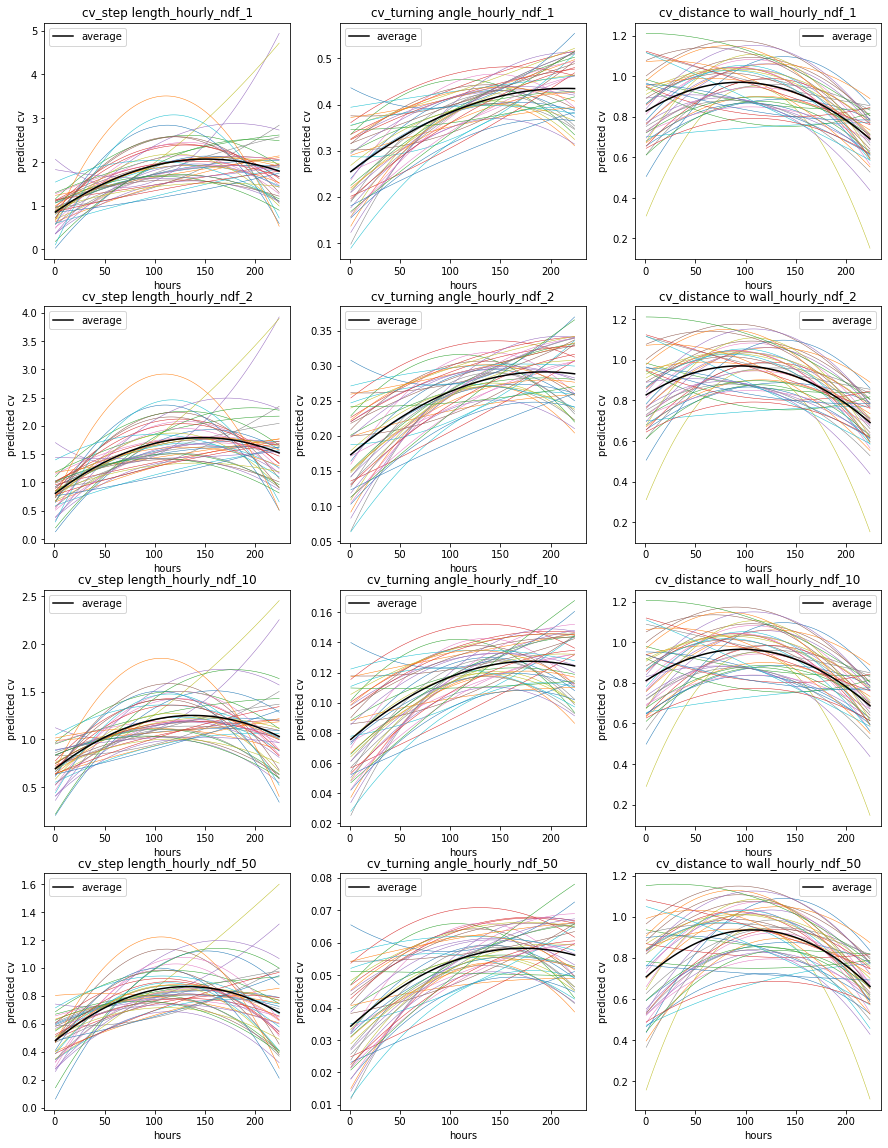

In [25]:
fig

In [8]:
for n_df in [1,2,10,50]:
    for flag in [True, False]:
        plasticity_cv_fig(parameters,fish_keys=f_keys, n_df=n_df,
                      forall=True, fit_degree=2, by_the_hour=flag)

hour 6 is not recorded block1_23520258_front 20211004_060000 108000 > 93622 94459.0 0.0
hour 6 is not recorded block1_23520258_front 20211004_060000 108000 > 93622 94459.0 0.0
hour 6 is not recorded block1_23520258_front 20211004_060000 108000 > 93622 94459.0 0.0
hour 7 is not recorded block1_23520258_front 20211005_060000 126000 > 65942 119982.0 0.0
hour 7 is not recorded block1_23520258_front 20211005_060000 126000 > 65942 119982.0 0.0
hour 7 is not recorded block1_23520258_front 20211005_060000 126000 > 65942 119982.0 0.0
hour 3 is not recorded block1_23520258_front 20211008_060000 54000 > 40403 43117.0 0.0
hour 3 is not recorded block1_23520258_front 20211008_060000 54000 > 40403 43117.0 0.0
hour 3 is not recorded block1_23520258_front 20211008_060000 54000 > 40403 43117.0 0.0
hour 2 is not recorded block1_23520278_front 20210911_060000 36000 > 19987 19992.0 0.0
hour 2 is not recorded block1_23520278_front 20210911_060000 36000 > 19987 19992.0 0.0
hour 2 is not recorded block1_2352